Importing all the packages

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import librosa


A1. Find the first derivative of your speech signal with finite difference method. Listen to the first derivative signal and the original speech signal.

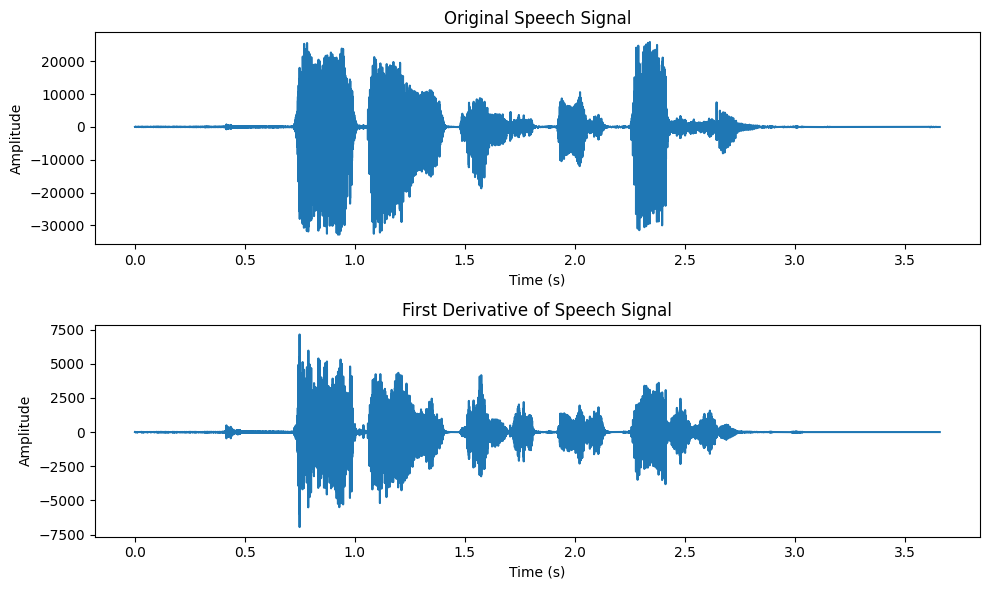

In [11]:
# Load the original speech signal
fs, speech = wavfile.read('Lab_01.wav')

# Convert to mono if stereo
if len(speech.shape) > 1:
    speech = np.mean(speech, axis=1)

# Finite difference method for derivative
first_derivative = np.diff(speech) 
# np.diff() uses Finite Difference Method (FDM) for calculating the first_derivative

# Append one more value to match the length
first_derivative = np.append(first_derivative, first_derivative[-1])

# Save the first derivative as a new audio file
wavfile.write('first_derivative.wav', fs, first_derivative.astype(np.int16))

# Plot and listen to the original speech and the first derivative
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(speech))/fs, speech)
# for FDM f'(x0)= ( f(x0+h)-f(x0)/h ) , here h=fs, which is the sampling frequency
plt.title('Original Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(first_derivative))/fs, first_derivative)
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


Original Audio

In [12]:
ipd.Audio("Lab_01.wav")

First Derivative

In [13]:
ipd.Audio("first_derivative.wav")

A2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

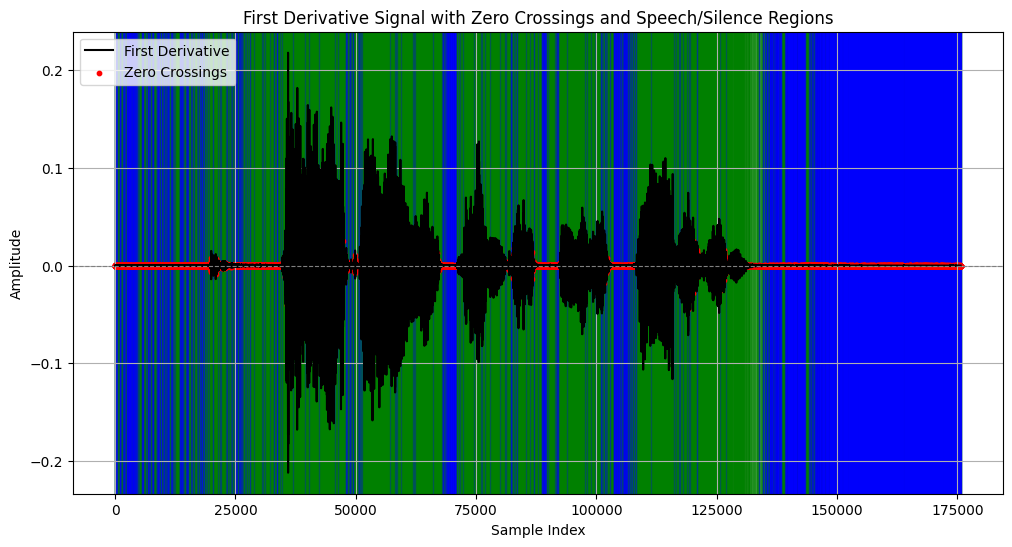

Average length between consecutive zero crossings in speech regions: 8.276532281343211
Average length between consecutive zero crossings in silence regions: 1.0


In [34]:
# Load the first derivative signal
file_path = 'first_derivative.wav'
first_derivative, fs = librosa.load(file_path, sr=None)

# Find zero crossings
zero_crossings = librosa.zero_crossings(first_derivative, pad=False)

# Compute lengths between consecutive zero crossings
lengths = np.diff(np.where(zero_crossings)[0])

# Determine speech and silence regions based on a length threshold
threshold = 1  # Adjust this threshold as needed
speech_indices = np.where(lengths > threshold)[0]
silence_indices = np.where(lengths <= threshold)[0]

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot speech and silence regions first to ensure they're below zero crossings
for idx in speech_indices:
    start_idx = np.where(zero_crossings)[0][idx]
    end_idx = np.where(zero_crossings)[0][idx + 1]
    ax.axvspan(start_idx, end_idx, color='green', alpha=0.3)

for idx in silence_indices:
    start_idx = np.where(zero_crossings)[0][idx]
    end_idx = np.where(zero_crossings)[0][idx + 1]
    ax.axvspan(start_idx, end_idx, color='blue', alpha=0.3)

# Plot first derivative signal
ax.plot(first_derivative, color='black', label='First Derivative')

# Mark zero crossings
zero_crossing_indices = np.where(zero_crossings)[0]
ax.scatter(zero_crossing_indices, first_derivative[zero_crossing_indices], color='red', label='Zero Crossings', s=10)

# Set labels and legend
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax.set_title('First Derivative Signal with Zero Crossings and Speech/Silence Regions')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Amplitude')
ax.legend()

# Show plot
plt.grid(True)
plt.show()

# Print average lengths
average_length_speech = np.mean(lengths[speech_indices])
average_length_silence = np.mean(lengths[silence_indices])
print("Average length between consecutive zero crossings in speech regions:", average_length_speech)
print("Average length between consecutive zero crossings in silence regions:", average_length_silence)


A Zoomed in region (between 4000 and 6000)

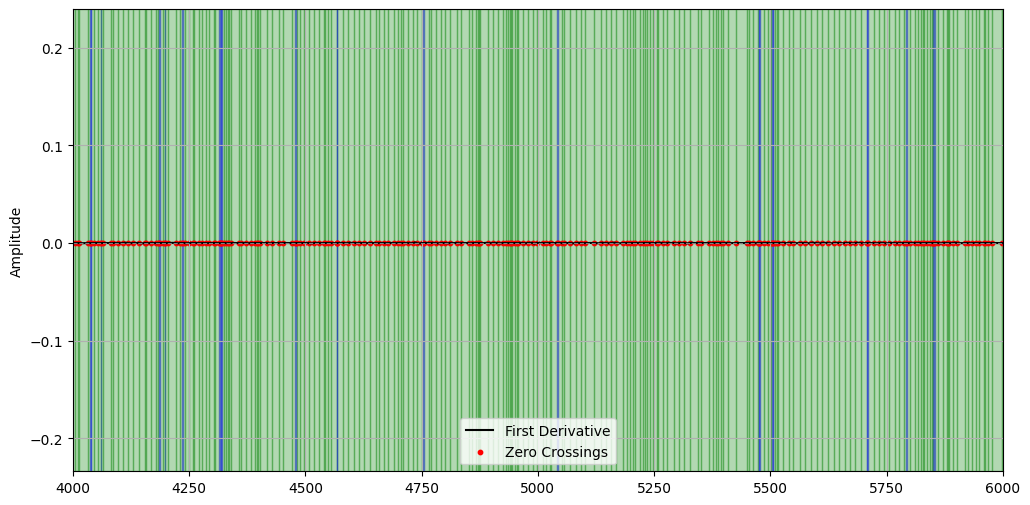

In [36]:
# Loading the first derivative signal
file_path = 'first_derivative.wav'
first_derivative, fs = librosa.load(file_path, sr=None)

# Finding zero crossings
zero_crossings = librosa.zero_crossings(first_derivative, pad=False)

# Computing lengths between consecutive zero crossings
lengths = np.diff(np.where(zero_crossings)[0])

# Determining speech and silence regions based on a length threshold
threshold = 1  # Adjust this threshold as needed
speech_indices = np.where(lengths > threshold)[0]
silence_indices = np.where(lengths <= threshold)[0]

# Creating figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Ploting the first derivative signal and  the speech/silence regions
for idx in speech_indices:
    start_idx = np.where(zero_crossings)[0][idx]
    end_idx = np.where(zero_crossings)[0][idx + 1]
    ax.axvspan(start_idx, end_idx, color='green', alpha=0.3)

for idx in silence_indices:
    start_idx = np.where(zero_crossings)[0][idx]
    end_idx = np.where(zero_crossings)[0][idx + 1]
    ax.axvspan(start_idx, end_idx, color='blue', alpha=0.3)

ax.plot(first_derivative, color='black', label='First Derivative')
ax.scatter(np.where(zero_crossings)[0], first_derivative[zero_crossings], color='red', label='Zero Crossings', s=10)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)
ax.legend()
ax.set_ylabel('Amplitude')
ax.grid(True)

# Zooming in on the region between 4000 and 6000
ax.set_xlim(4000, 6000)

plt.show()


A3. Speak 5 of your favorite words. Observe the length of the speech signals. Compare the lengths of your spoken words with those of your project team-mate.


Lengths of the spoken words nikhil: [2.3, 2.64, 2.82, 2.3, 2.04]
Lengths of the spoken words devansh: [2.56, 2.38, 2.38, 2.22, 2.9]


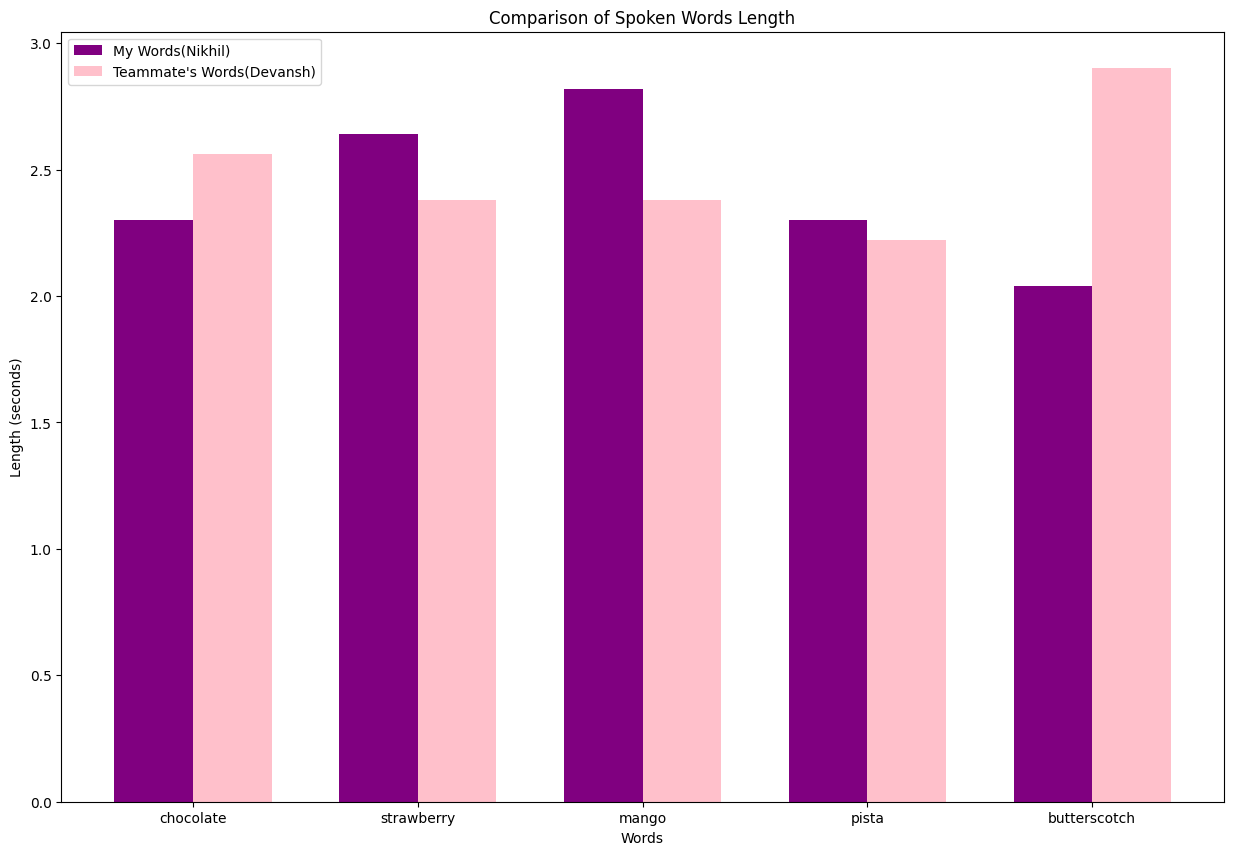

In [45]:
words = ['chocolate', 'strawberry', 'mango', 'pista', 'butterscotch']
word_files_nikhil = ['chocolate_nikhil.wav','Strawberry_nikhil.wav','mango_nikhil.wav','pista_nikhil.wav','butterscotch_nikhill.wav']
word_files_devansh = ['chocolate_devansh.wav','Strawberry_devansh.wav','mango_devansh.wav','pista_devansh.wav','butterscotch_devansh.wav']
words = ['chocolate', 'strawberry', 'mango', 'pista', 'butterscotch']
word_lengths_nikhil = []
word_lengths_devansh = []

for word_file in word_files_nikhil:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_nikhil.append(length_seconds)

for word_file in word_files_devansh:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_devansh.append(length_seconds)

print("Lengths of the spoken words nikhil:", word_lengths_nikhil)
print("Lengths of the spoken words devansh:", word_lengths_devansh)

bar_width = 0.35
index = np.arange(len(words))
plt.figure(figsize=(15, 10))
plt.bar(index - bar_width/2, word_lengths_nikhil, bar_width, label='My Words(Nikhil)', color='Purple')
plt.bar(index + bar_width/2, word_lengths_devansh, bar_width, label="Teammate's Words(Devansh)", color='Pink')
plt.xlabel('Words')
plt.ylabel('Length (seconds)')
plt.title('Comparison of Spoken Words Length')
plt.xticks(index, words)
plt.legend()

plt.show()

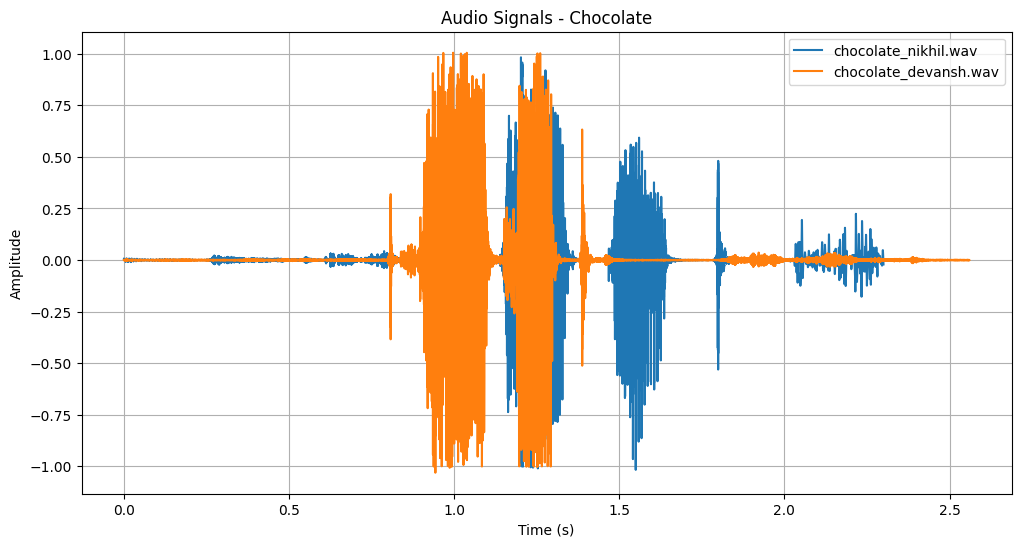

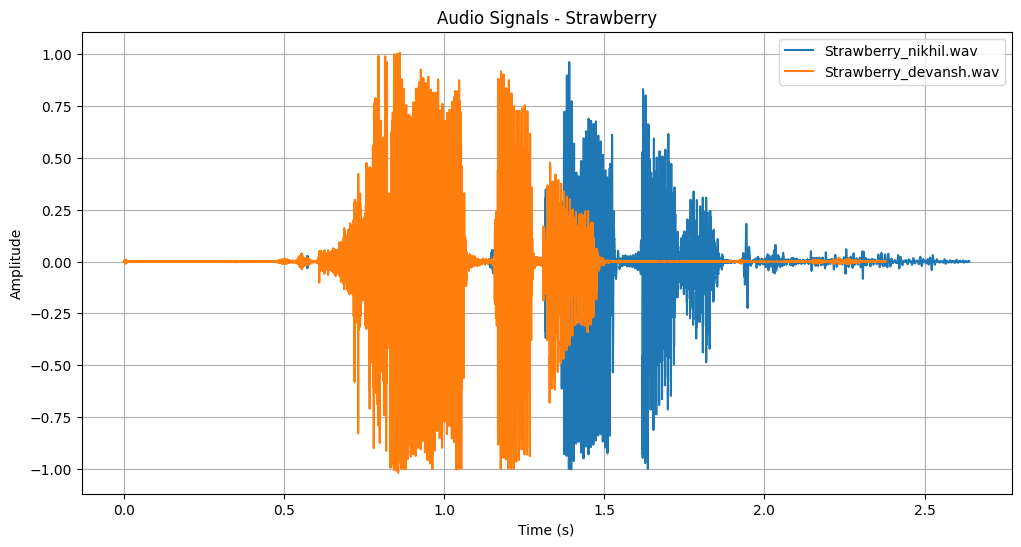

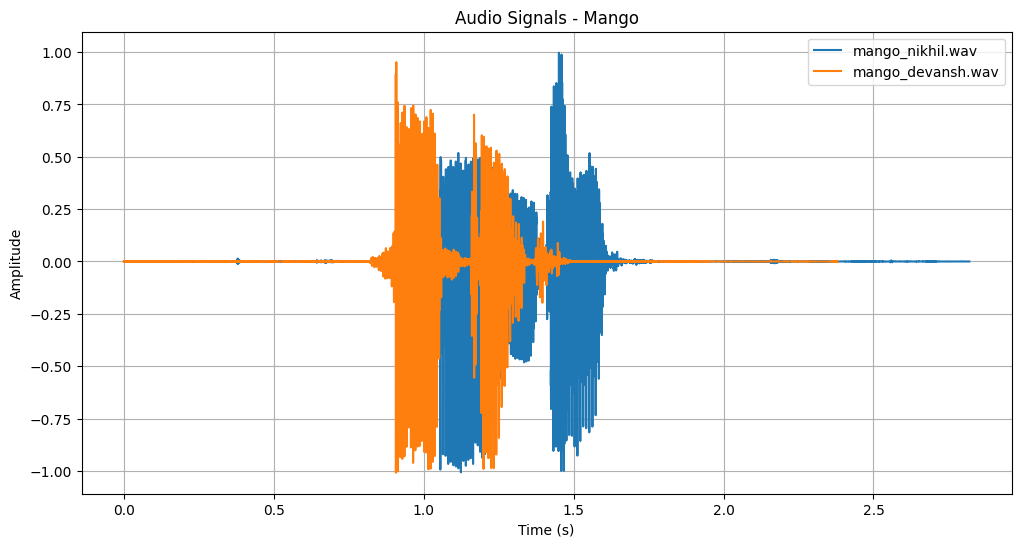

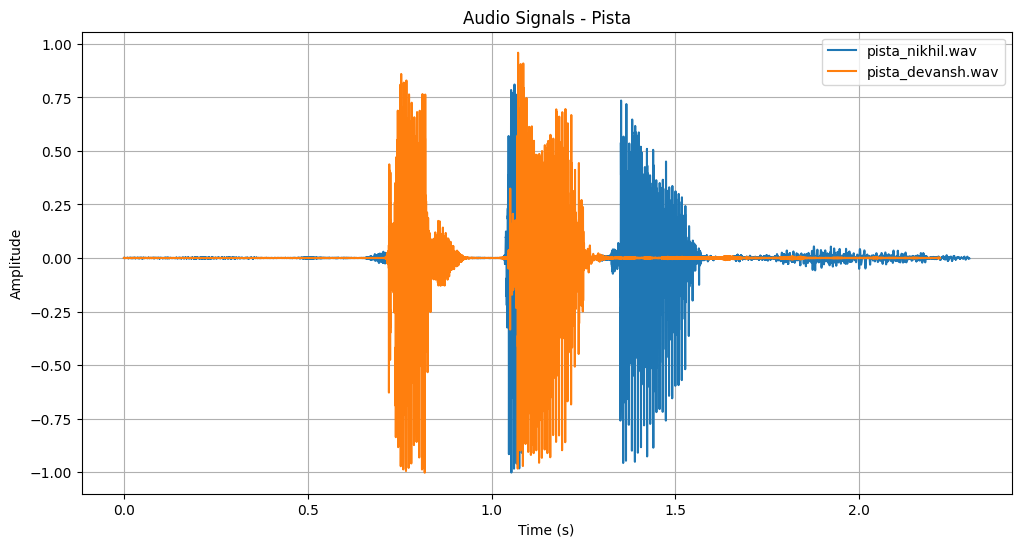

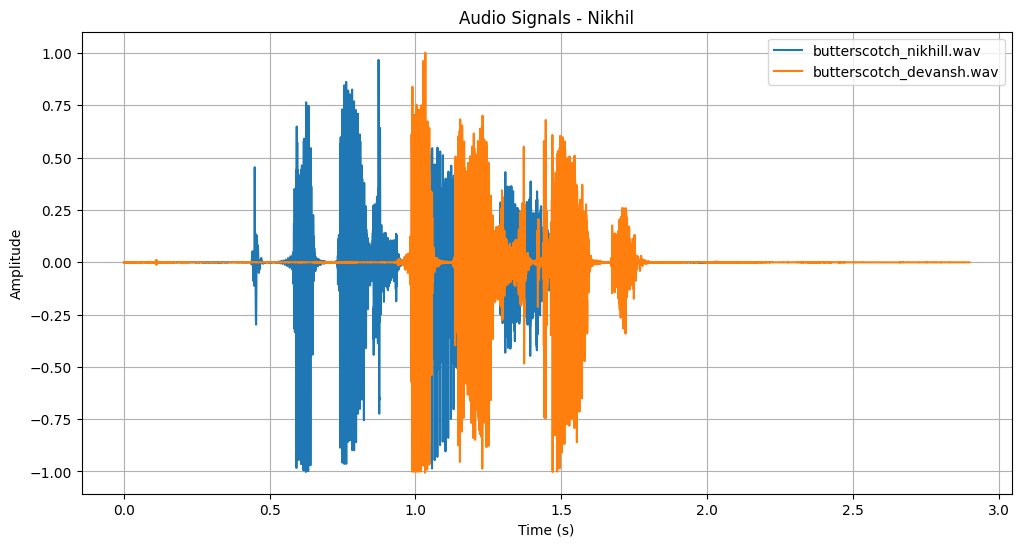

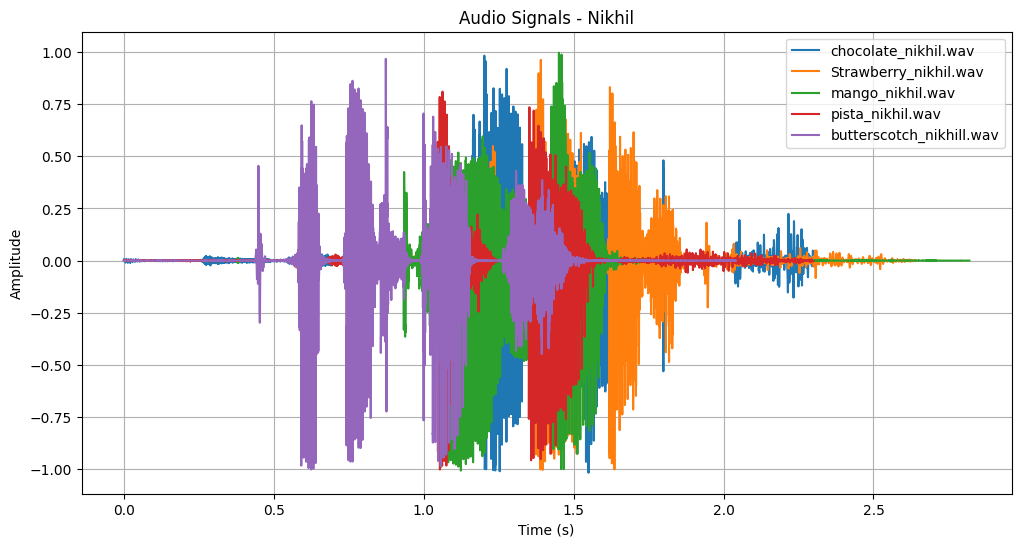

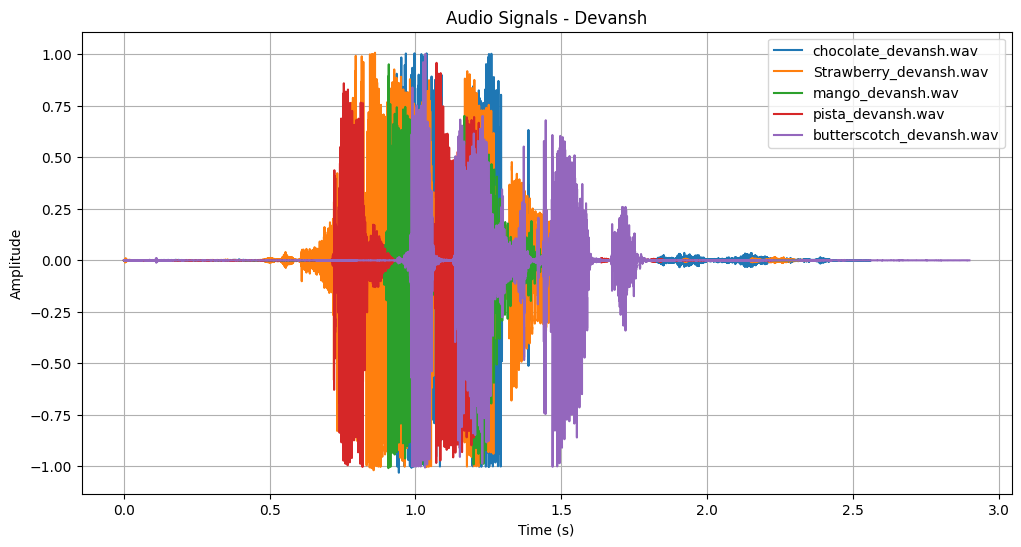

In [1]:
def plot_audio_signals(word_files, title):
    plt.figure(figsize=(12, 6))
    for idx, filename in enumerate(word_files):
        y, sr = librosa.load(filename)
        duration = librosa.get_duration(y=y, sr=sr)
        time = np.linspace(0, duration, len(y))
        plt.plot(time, y, label=f'{filename.split("_")[0]}_{filename.split("_")[1]}')
    
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

word_files_nikhil = ['chocolate_nikhil.wav','Strawberry_nikhil.wav','mango_nikhil.wav','pista_nikhil.wav','butterscotch_nikhill.wav']
word_files_devansh = ['chocolate_devansh.wav','Strawberry_devansh.wav','mango_devansh.wav','pista_devansh.wav','butterscotch_devansh.wav']

plot_audio_signals(['chocolate_nikhil.wav','chocolate_devansh.wav'], "Audio Signals - Chocolate")
plot_audio_signals(['Strawberry_nikhil.wav','Strawberry_devansh.wav'], "Audio Signals - Strawberry")
plot_audio_signals(['mango_nikhil.wav','mango_devansh.wav'], "Audio Signals - Mango")
plot_audio_signals(['pista_nikhil.wav','pista_devansh.wav'], "Audio Signals - Pista")
plot_audio_signals(['butterscotch_nikhill.wav','butterscotch_devansh.wav'], "Audio Signals - Nikhil")

plot_audio_signals(word_files_nikhil, "Audio Signals - Nikhil")
plot_audio_signals(word_files_devansh, "Audio Signals - Devansh")


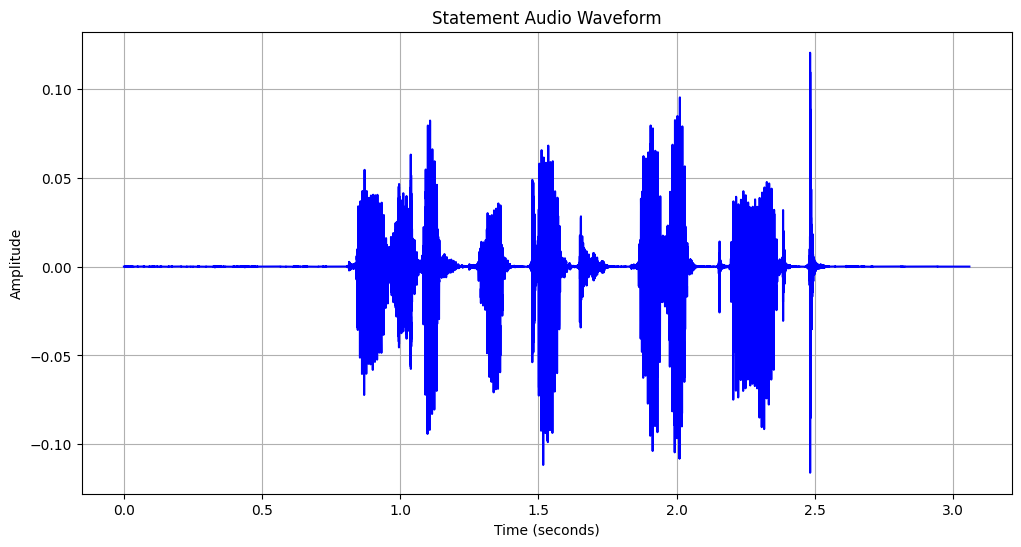

Statement Audio:


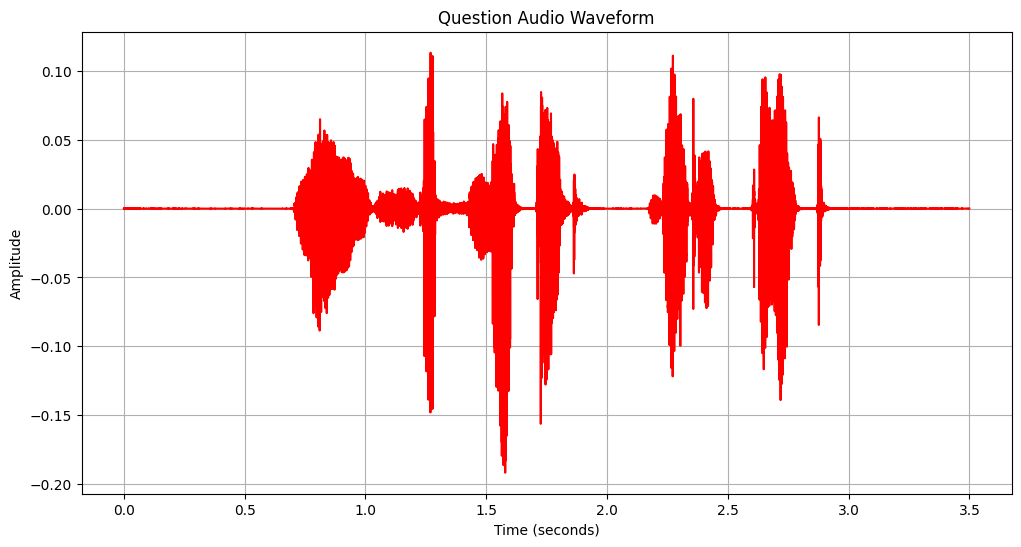

Question Audio:
Duration of Statement Audio: 3.06 seconds
Duration of Question Audio: 3.5 seconds
Mean Amplitude of Statement Audio: 0.0044322964
Mean Amplitude of Question Audio: 0.0061697927
Peak Amplitude of Statement Audio: 0.12042236
Peak Amplitude of Question Audio: 0.19189453


In [2]:
# Loading the statement audio file
statement_audio, sr_statement = librosa.load("You_Submitted_the_Report.wav", sr=None)

# Loading the question audio file
question_audio, sr_question = librosa.load("You_Submitted_the_Report_QQ.wav", sr=None)

# Displaying waveform and listen to the statement audio
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(statement_audio) / sr_statement, len(statement_audio)), statement_audio, color='b')
plt.title('Statement Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

print("Statement Audio:")
ipd.Audio("You_Submitted_the_Report.wav")

# Displaying waveform and listen to the question audio
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(question_audio) / sr_question, len(question_audio)), question_audio, color='r')
plt.title('Question Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

print("Question Audio:")
ipd.Audio("You_Submitted_the_Report_QQ.wav")

# Comparing duration of the two audio files
duration_statement = librosa.get_duration(y=statement_audio, sr=sr_statement)
duration_question = librosa.get_duration(y=question_audio, sr=sr_question)

print("Duration of Statement Audio:", duration_statement, "seconds")
print("Duration of Question Audio:", duration_question, "seconds")

# Comparing mean amplitude of the two audio files
mean_amplitude_statement = np.mean(np.abs(statement_audio))
mean_amplitude_question = np.mean(np.abs(question_audio))

print("Mean Amplitude of Statement Audio:", mean_amplitude_statement)
print("Mean Amplitude of Question Audio:", mean_amplitude_question)

# Comparing peak amplitude of the two audio files
peak_amplitude_statement = np.max(np.abs(statement_audio))
peak_amplitude_question = np.max(np.abs(question_audio))

print("Peak Amplitude of Statement Audio:", peak_amplitude_statement)
print("Peak Amplitude of Question Audio:", peak_amplitude_question)
